## Reading dataset
Lets read MNIST dataset and display first few images

In [57]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [58]:
# Step 1: Load the MNIST dataset. It has 60,000 images for training and 10,000 images for testing.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Step 2: Display the shape of the dataset
print(f"x_train shape: {x_train.shape}")  # (60000, 28, 28). 
print(f"y_train shape: {y_train.shape}")  # (60000,)
print(f"x_test shape: {x_test.shape}")    # (10000, 28, 28)
print(f"y_test shape: {y_test.shape}")    # (10000,)


x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


(28, 28)
--------------------
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 

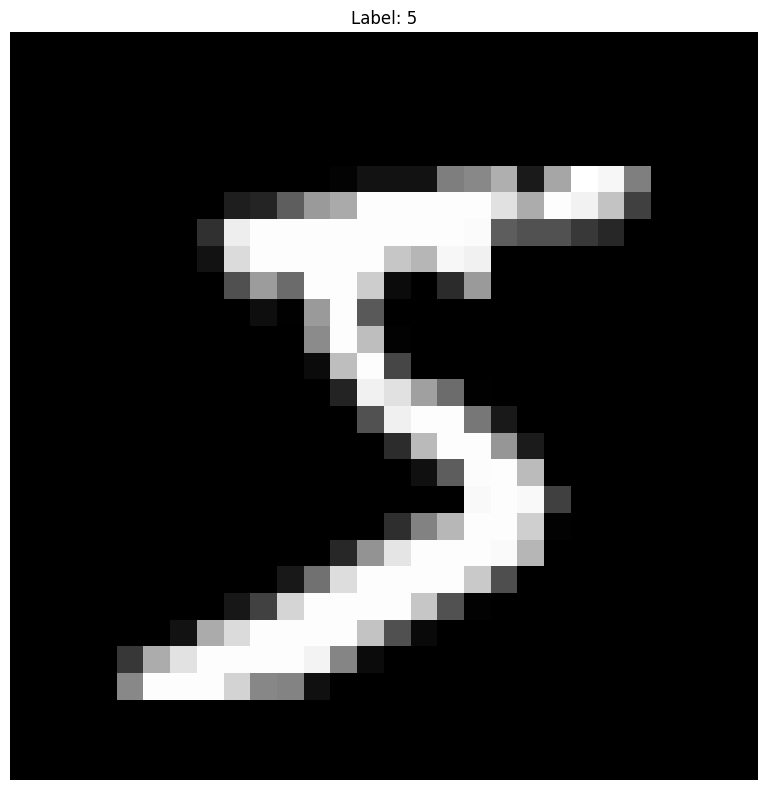

In [59]:
# Lets look at the first image data and also plot it. We are trybing to understand the image data
img_idx=0

print(x_train[img_idx].shape)
print("--------------------")
np.set_printoptions(linewidth=150, precision=2, suppress=True)  # Adjust formatting
print(x_train[img_idx])
print("*********************")
plt.figure(figsize=(8,8))  # Set the figure size

plt.imshow(x_train[img_idx],
           cmap='gray' # # Display the image in grayscale. comment it out if u want to see color
)  
plt.title(f"Label: {y_train[img_idx]}")  # Set the title as the label
plt.axis('off')  # Turn off axis
plt.tight_layout()
plt.show()


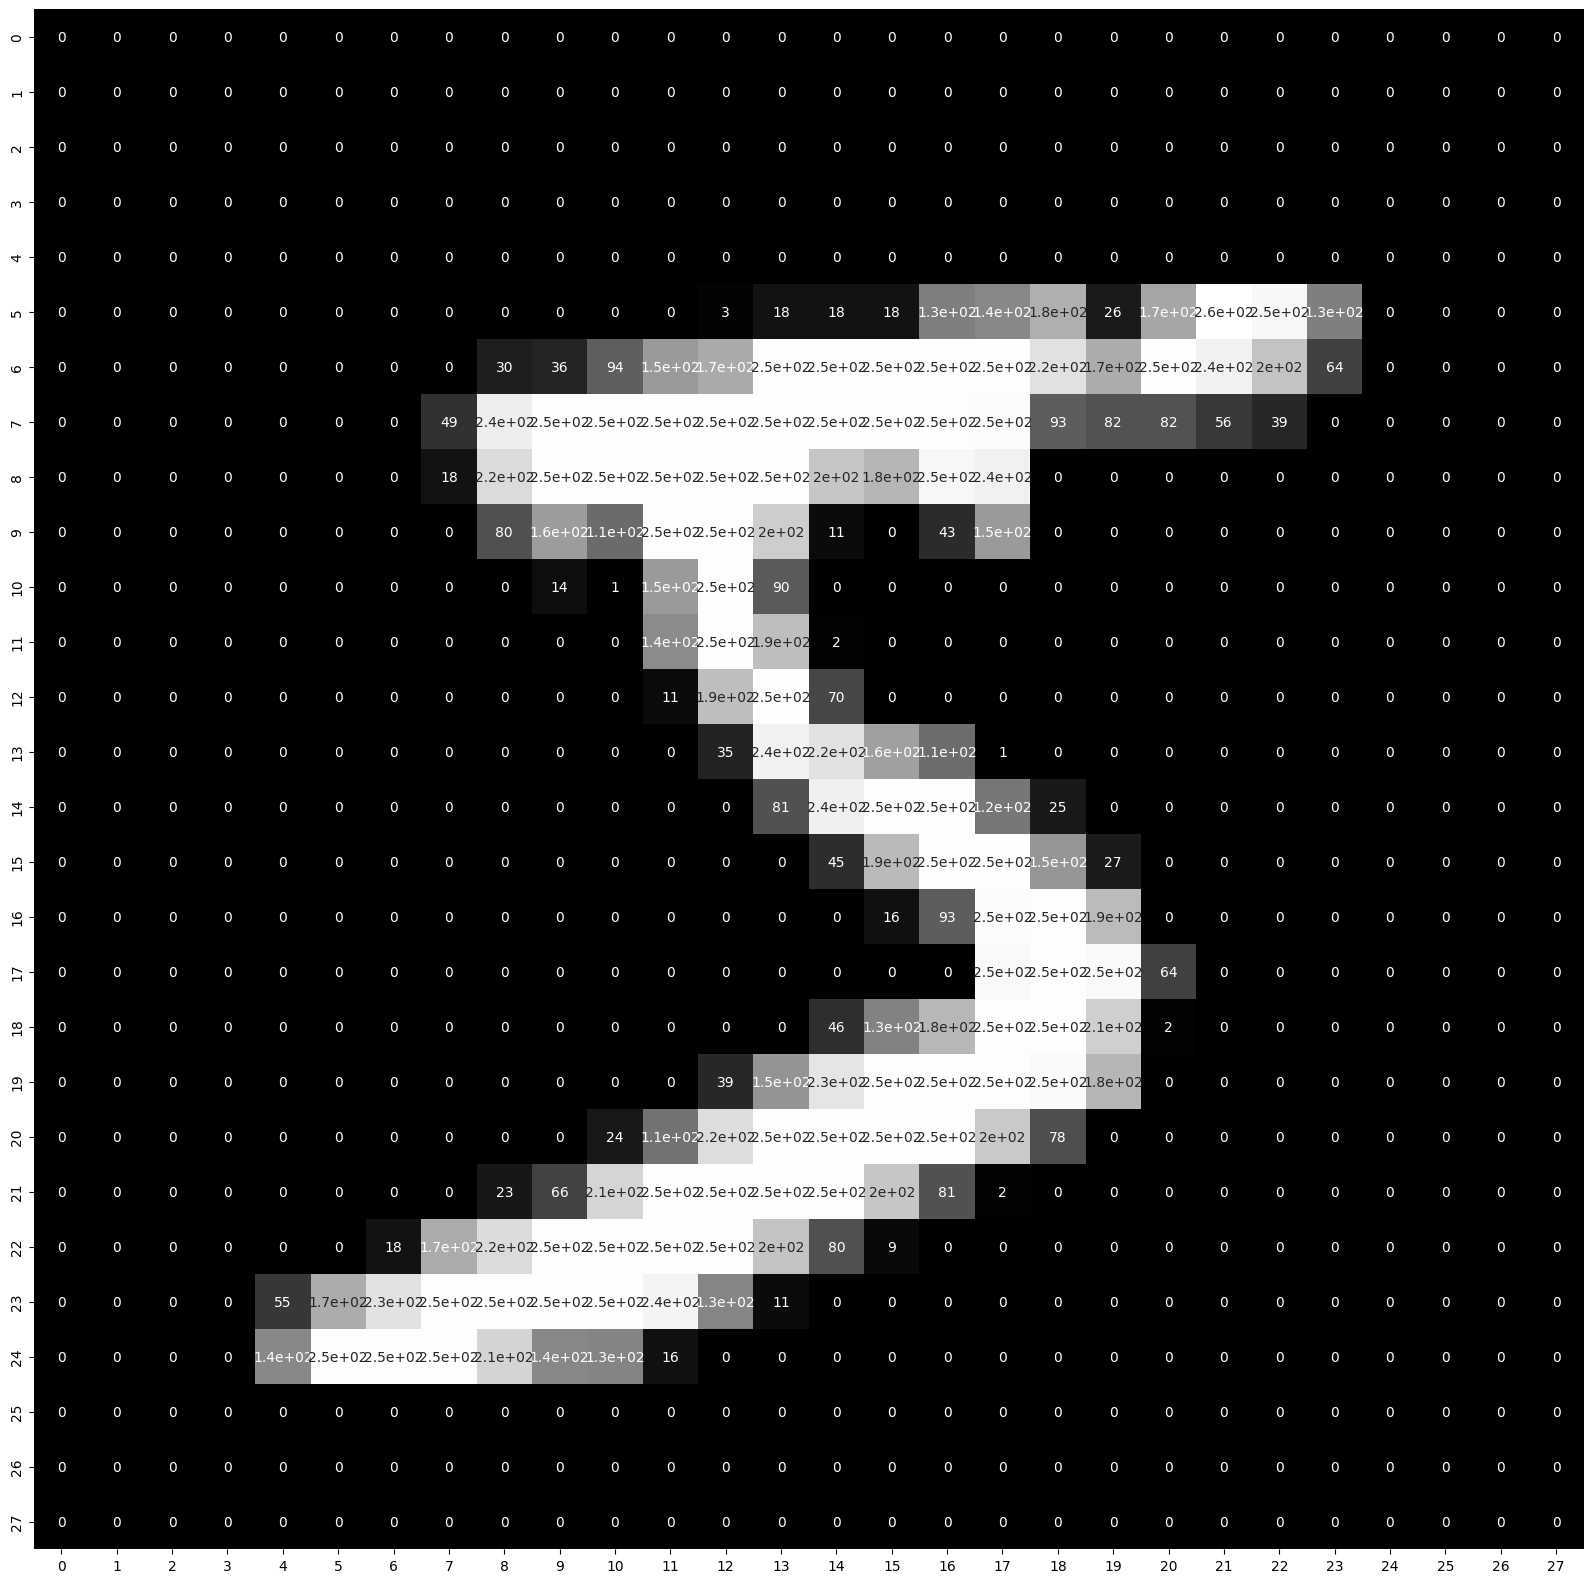

In [60]:
# Lets visualize above using heatmap.
plt.figure(figsize=(20, 20))
sns.heatmap(x_train[img_idx], annot=True, cmap="gray", cbar=False)
plt.show()

Lets understand above data. The first image, which is 5, has 28 rows and 28 columns. It is so because this is image size 28 X 28. Each value in the row,col is from 0-255, which is color range.

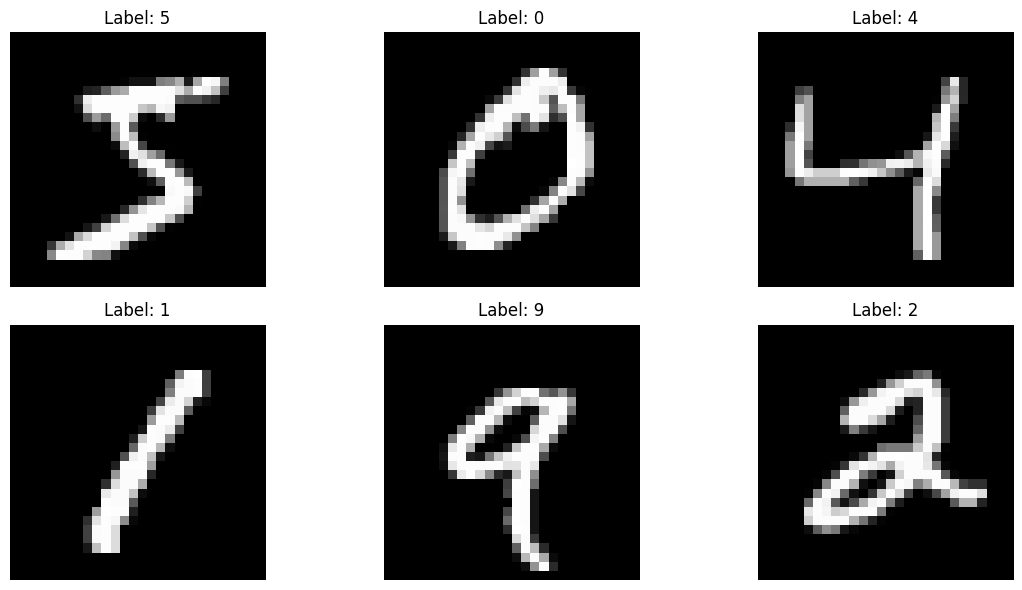

In [61]:
# Display the first 6 images with their labels
plt.figure(figsize=(12, 6))  # Set the figure size
for i in range(6):
    plt.subplot(2, 3, i + 1)  # Create a 2x3 grid for 6 images
    plt.imshow(x_train[i], cmap='gray')  # Display the image in grayscale
    plt.title(f"Label: {y_train[i]}")  # Set the title as the label
    plt.axis('off')  # Turn off axis
plt.tight_layout()
plt.show()


In [62]:
# Now we convert the 28X28 image data, which is a 2D array, into 1D array whose size would be 28*28=784.
# We do this becuase the input layer of Neural Network accepts only 1D data.

x_train = x_train.reshape(-1, 784).astype('float32') / 255.0  # Flatten and normalize training data
x_test = x_test.reshape(-1, 784).astype('float32') / 255.0    # Flatten and normalize test data

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [63]:
#Lets look at the value of 1st image now and compare with above
print(x_train[0]) # This is 1D array whose size is 784

[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.01 0.07 0.07 0.07 0.49 0.53 0.69 0.1  0.65 1.   0.97 0.5  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.12 0.14 0.37 0.6  0.67 0.99 0.99 0.99 0.99 0.99 0.88 0.67 0.99 0.95 0.76 0.25 0.   0.   0.   0.   0.   0.   0.   0.   0.   

## Creating a Simple Neural Network using tf.keras
tf.keras is TensorFlow's high-level API to build and train deep learning models. You can define models using the Sequential class for a simple stack of layers

Example (Simple Feedforward Neural Network):

In [64]:
# Lets create a simple model which takes input 28*28=784 features, and produces output that are in 10 classes(0-9)
import tensorflow as tf
from tensorflow.keras import layers, models

# Create a simple sequential model
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(784,)),  # Input layer (28*28=784 features)
    layers.Dense(10, activation='softmax')  # Output layer (10 classes)
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model summary to see the architecture
model.summary()

c:\Users\hi\Desktop\projects\python_projects\tutorial\tut_tensorflow\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,890 (198.79 KB)

 Trainable params: 50,890 (198.79 KB)

 Non-trainable params: 0 (0.00 B)

## Use above model
Lets use above model 

To train a model, you need data. You can use tf.data to load datasets efficiently, and you can train models using the .fit() method on the dataset.

Example (Training a model on MNIST data): ( took 2 minutes)

In [65]:

# Train the model
model.fit(x_train, y_train, epochs=3, batch_size=32, validation_split=0.1)  # Train for 3 epochs

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.2f}")

Epoch 1/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8504 - loss: 0.5285 - val_accuracy: 0.9558 - val_loss: 0.1528
Epoch 2/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9537 - loss: 0.1593 - val_accuracy: 0.9670 - val_loss: 0.1148
Epoch 3/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9666 - loss: 0.1143 - val_accuracy: 0.9710 - val_loss: 0.1011
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9654 - loss: 0.1224 
Test accuracy: 0.97


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
Predictions for the first 5 test samples:
[7 2 1 0 4]
True labels: [7 2 1 0 4]


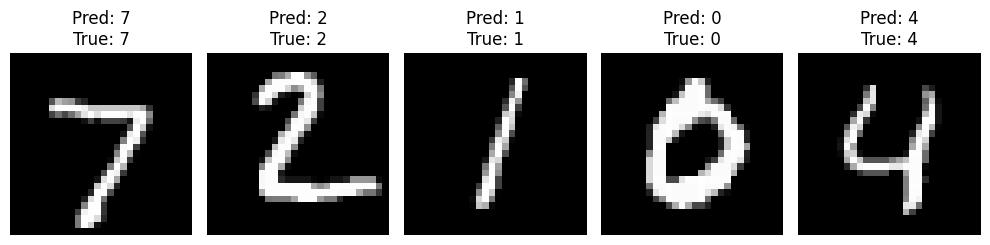

In [66]:
# Make predictions
predictions = model.predict(x_test[:5])  # Predict on the first 5 samples of the test set
predicted_labels = predictions.argmax(axis=1)

print("Predictions for the first 5 test samples:")
print(predicted_labels)  # Print predicted class labels
print("True labels:", y_test[:5])  # Print true class labels

# Display the first 5 images with predictions
x_test_images = x_test[:5].reshape(-1, 28, 28)  # Reshape back to 28x28 for visualization

plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)  # Create subplots for 5 images
    plt.imshow(x_test_images[i], cmap='gray')  # Display the image
    plt.title(f"Pred: {predicted_labels[i]}\nTrue: {y_test[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

## Create and train different model on the same dataset


In [68]:
# import tensorflow as tf
# from tensorflow.keras.datasets import mnist

# Load and prepare the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Build a simple model (as we did previously)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # Flatten 28x28 images into 1D
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model on the MNIST training data
model.fit(x_train, y_train, epochs=5)

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8602 - loss: 0.4843
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9547 - loss: 0.1524
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9686 - loss: 0.1057
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9731 - loss: 0.0885
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9773 - loss: 0.0740
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9743 - loss: 0.0862
Test accuracy: 0.9776999950408936


By increasing model hidden layers and adding drop out layer has increased the accuracy little bit.

## Saving and Loading Models
Once a model is trained, you can save it to disk and load it later for inference or retraining.

Example:

In [70]:
# Save the model
model.save("temp/model.keras")

# Load the model back
loaded_model = tf.keras.models.load_model("temp/model.keras")

# Evaluate the loaded model
test_loss, test_acc = loaded_model.evaluate(x_test, y_test)
print(f'Loaded model test accuracy: {test_acc}')


c:\Users\hi\Desktop\projects\python_projects\tutorial\tut_tensorflow\.venv\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 6 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9743 - loss: 0.0862
Loaded model test accuracy: 0.9776999950408936


## Above model on different dataset(Optional)
Lets use above model on diferent dataset, that is NOT vision type.